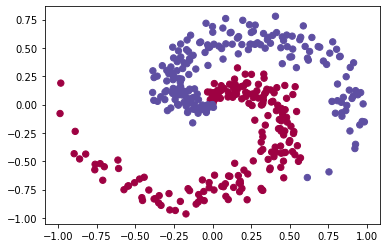

In [16]:
import numpy as np
import matplotlib.pyplot as plt

N = 200  # number of points per class
D = 2   # dimensionality
K = 2   # number of classes (2 branches)
X = np.zeros((N * K, D))  # data matrix (each row = single example)
y = np.zeros(N * K, dtype='uint8')  # class labels

for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.4  # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]

# Set color labels for the branches
y[:N] = 0  # First branch (red)
y[N:] = 1  # Second branch (blue)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

# Linear Classifier

In [17]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):

  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print (f"iteration {i}: loss {loss}")

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)

  dW += reg*W # regularization gradient

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 0.6895442267690738
iteration 10: loss 0.528089900323474
iteration 20: loss 0.4882948389719435
iteration 30: loss 0.4731848219711476
iteration 40: loss 0.466119343708459
iteration 50: loss 0.462416327331286
iteration 60: loss 0.46033283420969373
iteration 70: loss 0.4591030821982865
iteration 80: loss 0.45835212797895997
iteration 90: loss 0.45788193106809066
iteration 100: loss 0.4575819121475584
iteration 110: loss 0.45738767942371567
iteration 120: loss 0.45726050163099863
iteration 130: loss 0.45717648321197574
iteration 140: loss 0.4571205823118133
iteration 150: loss 0.45708317719787217
iteration 160: loss 0.45705803335794704
iteration 170: loss 0.4570410688103571
iteration 180: loss 0.45702958827524875
iteration 190: loss 0.4570217998357778


In [18]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print(f'training accuracy: {np.mean(predicted_class == y):.2f}')

training accuracy: 0.68


# NN Classifier

In [19]:
X = X.T
Y = np.expand_dims(y, axis=0)

In [20]:
Y.shape[1]

400

In [21]:
# A COMPLETER
print("Shape of X : ",X.shape)
print("Shape of Y : ",Y.shape)
print("Number of training examples : ",len(X[0]))

Shape of X :  (2, 400)
Shape of Y :  (1, 400)
Number of training examples :  400


In [22]:
def layer_size(X, Y, h=4):
  return (X.shape[0], h, Y.shape[0])

In [23]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    return {"W1":W1, "b1":b1, "W2":W2, "b2":b2}

In [30]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [31]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]


    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    assert(A2.shape == (1, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

In [32]:
def compute_cost(A2, Y):
    m = Y.shape[1] 
    cost = -1/m * (np.dot(Y, np.log(A2).T) + np.dot((1-Y), np.log(1-A2).T))

    cost = float(np.squeeze(cost))                           
    return cost

In [33]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

In [50]:
def update_parameters(parameters, grads, learning_rate = 1.9):
  
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
  
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2


    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [51]:
def nn(X, Y, n_h, num_iterations = 10000):
  n_x = layer_size(X, Y)[0]
  n_y = layer_size(X, Y)[2]

  parameters = initialize_parameters(n_x, n_h, n_y)
  for i in range(num_iterations):
    A2, cache = forward_propagation(X, parameters)
    cost = compute_cost(A2, Y)
    grads = backward_propagation(parameters, cache, X, Y)
    parameters = update_parameters(parameters, grads)
  return parameters 

In [52]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)

    return predictions

In [53]:
parameters = nn(X, Y, 4, num_iterations=10000)

ValueError: 'c' argument has 400 elements, which is inconsistent with 'x' and 'y' with size 2.

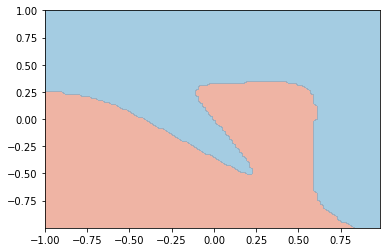

In [54]:
# Define a meshgrid to create a grid of points for classification
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use the trained classifier (e.g., neural network) to make predictions for each point in the meshgrid
mesh_input = np.c_[xx.ravel(), yy.ravel()].T  # Transpose the mesh_input
mesh_output = predict(parameters, mesh_input)
mesh_output = mesh_output.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, mesh_output, cmap=plt.cm.RdBu, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.bwr)
plt.title("Decision Boundaries of the Classifier")
plt.show()